In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load Data

In [15]:
# Load data
df = pd.read_csv("data_preprocessed.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.524780,1.0,0.792992,0.622545,0.666667,1.0,0.465753,0.625000,0.0,0.0,0.711022,1.0,0.338009,0.000000,0.666667,0.75,3
1,0.258801,0.0,0.297105,0.325484,0.666667,1.0,0.023310,0.507414,0.0,0.0,0.042645,1.0,0.000000,0.646730,0.666667,0.75,2
2,0.475505,1.0,0.723608,0.355762,0.666667,1.0,0.285714,0.000000,0.0,0.0,0.362750,1.0,0.498366,0.400000,0.000000,0.75,5
3,0.424484,1.0,0.544808,0.426051,1.000000,1.0,0.285714,0.625000,0.0,0.0,0.555116,1.0,0.720433,0.514847,0.666667,0.75,2
4,0.499824,1.0,0.749063,0.623040,0.666667,1.0,0.544648,0.528761,0.0,0.0,0.520723,1.0,0.249183,0.144864,0.666667,0.75,3


Split kedua (sesudah preprocessing):

Kamu sudah anggap dataset siap pakai (hasil SMOTE), lalu mau bagi ulang menjadi train/test untuk pemodelan.

In [16]:
X_train = df.drop('NObeyesdad', axis=1)
y_train = df['NObeyesdad']

X_test, y_test = joblib.load('test_data.pkl')  # dari preprocessing

In [17]:
# # Pisahkan fitur dan target
# X = df.drop("NObeyesdad", axis=1)
# y = df["NObeyesdad"]

# # Split data untuk modeling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
y_train.value_counts()

NObeyesdad
3    246
2    246
5    246
4    246
1    246
6    246
0    246
Name: count, dtype: int64

In [19]:
y_test.value_counts()

NObeyesdad
2    105
4     97
3     89
6     87
1     86
5     83
0     81
Name: count, dtype: int64

In [20]:
print(X_train.shape, y_train.shape)

(1722, 16) (1722,)


In [21]:
# # Load data yang sudah di-preprocess
# df_train = pd.read_csv("train_resampled.csv")
# df_test = pd.read_csv("test.csv")

In [22]:
# print(df_train["NObeyesdad"].value_counts())

In [23]:
# print(df_test["NObeyesdad"].value_counts())  # Boleh tidak seimbang

# Modeling and Evaluation

Modeling yang digunakan ada 3 yaitu :
- Decision Tree
- Random Forest
- SVM

In [24]:
# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [25]:
# Untuk menyimpan hasil evaluasi
results = {}

fungsi Looping untuk melihat hasil Evaluasi dari modeling yang meliputi:
- Akurasi
- Precision
- Recall
- F1-Score
- Confusion Matriks

yang disimpan dan dikemas dalam classfication report

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        81
           1       0.78      0.78      0.78        86
           2       0.90      0.91      0.91       105
           3       0.95      0.94      0.95        89
           4       0.99      0.97      0.98        97
           5       0.77      0.81      0.79        83
           6       0.88      0.86      0.87        87

    accuracy                           0.89       628
   macro avg       0.88      0.88      0.88       628
weighted avg       0.89      0.89      0.89       628



D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        81
           1       0.82      0.95      0.88        86
           2       0.96      0.94      0.95       105
           3       1.00      0.99      0.99        89
           4       1.00      1.00      1.00        97
           5       0.95      0.88      0.91        83
           6       0.90      0.93      0.92        87

    accuracy                           0.94       628
   macro avg       0.95      0.94      0.94       628
weighted avg       0.95      0.94      0.94       628


=== SVM ===
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        81
           1       0.72      0.65      0.68        86
           2       0.80      0.84      0.82       105
           3       0.89      0.97      0.92        89
           4       0.99      0.99      0.99        97
           5       0.73      0.81      0.7

Menampilkan Bar perbandingan antara ketiga model dengan parameter confusion matriks

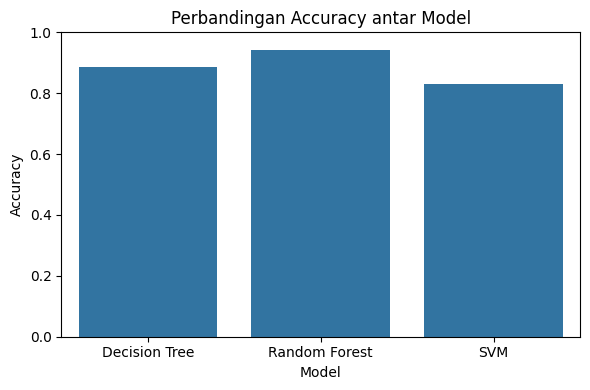

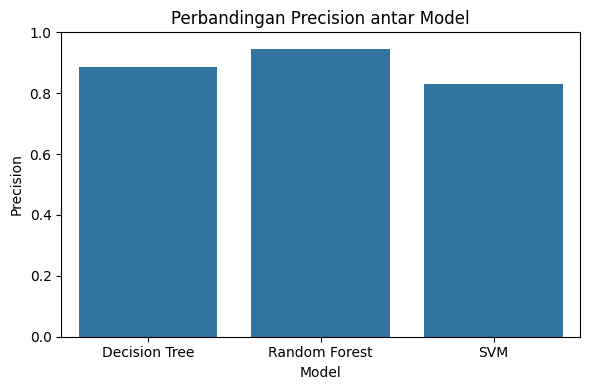

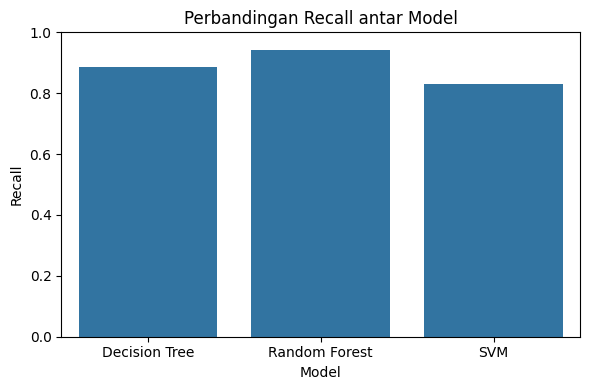

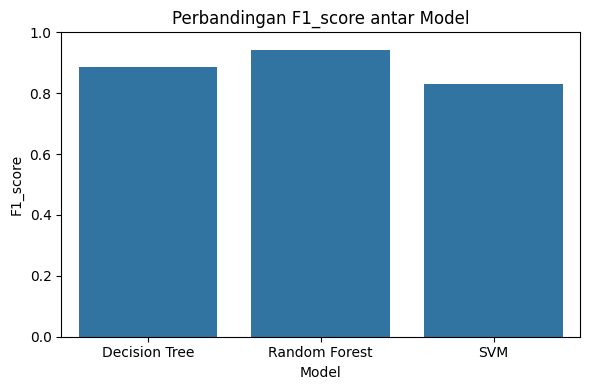

In [28]:
# Visualisasi perbandingan metrik
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.title(f'Perbandingan {metric.capitalize()} antar Model')
    sns.barplot(x=list(results.keys()), y=[results[m][metric] for m in results])
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

Menampilkan Visualisasi dari Confusion Matriks dari ketiga model tersebut

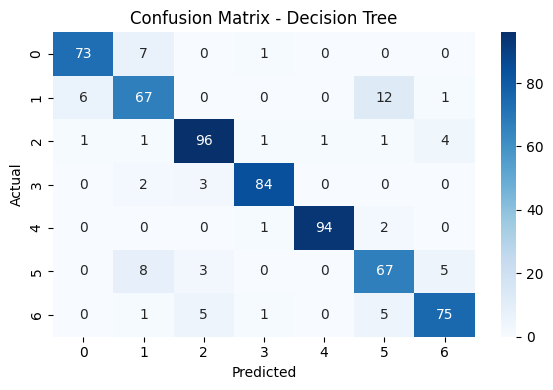

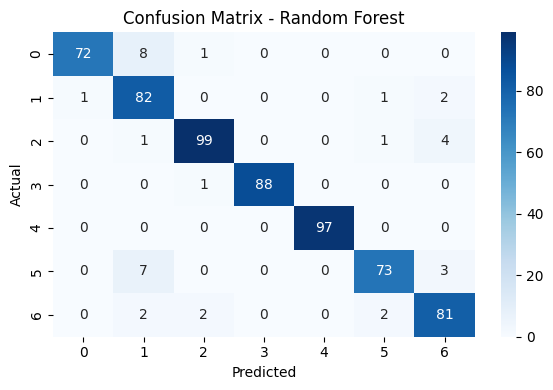

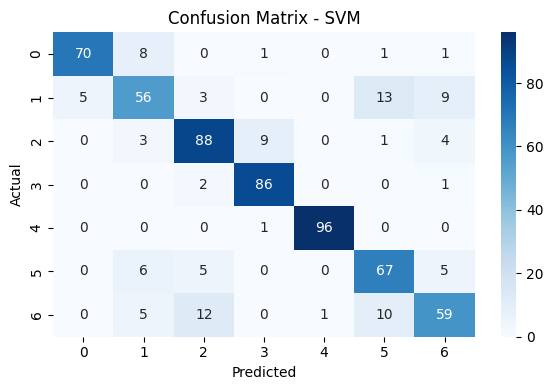

In [30]:
# Visualisasi confusion matrix
for name in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Kesimpulan Modeling:

Dari ketiga model yang diuji (Decision Tree, Random Forest, dan SVM), terlihat bahwa model Random Forest memberikan performa terbaik secara keseluruhan, dengan nilai akurasi, presisi, recall, dan F1-score yang lebih tinggi dibandingkan Decision Tree dan SVM.